# 🔧 Data Preprocessing for Predictive Modeling
Now that we've completed our exploratory and correlation analysis, the next step is to prepare the dataset for building a reliable and accurate predictive model. This Data Preprocessing phase is critical, as the quality and structure of the input data directly influence the performance of any machine learning model.

# 🎯 Objective
To ensure our data is clean, well-distributed, and representative free from distortions such as skewed distributions or outliers — and enriched with any useful engineered variables.

# 🧩 This Phase Includes:
1. Skewness Detection and Correction
Identify skewed variables that may bias the model and apply appropriate transformations to normalize their distributions.

2. Outlier Handling
Detect and manage extreme values that could disproportionately influence model training.

3. Feature Engineering (Variable Creation)
Create new variables or transformations that can enhance the model’s ability to capture meaningful patterns and relationships.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import missingno as msno
import matplotlib.dates as mdates

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax, skew
style.use('fivethirtyeight')
import warnings as wa

In [2]:
wa.filterwarnings('ignore')

In [3]:
df=pd.read_csv("analysis_ready_dataset.csv")
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01


# 📐 Step 1: Skewness Detection

🧠 Why It Matters:
Skewness refers to the asymmetry in the distribution of a variable. Most predictive models, especially linear models, assume that input variables follow a normal (bell-shaped) distribution. Highly skewed features can reduce model accuracy and cause biased predictions.

🔍 What We'll Do:
1. Check the skewness of each numerical feature (including the target Inflation_Rate).

2. Visualize distributions using histograms or KDE plots.

3. Apply transformations (like log, square root, or Box-Cox) where needed.

# Target Variable Analysis (Inflation Rate)

In [9]:
df['Inflation_Rate'].describe()

count    198.000000
mean      14.068232
std        5.456106
min        7.700000
25%       10.625000
50%       12.735000
75%       16.040000
max       34.190000
Name: Inflation_Rate, dtype: float64

In [10]:
def univariate_plot_inflation(df):
    feature = 'Inflation_Rate'
    
    # Creating a custom chart with defined figure size
    fig = plt.figure(constrained_layout=True, figsize=(12, 6))
    
    # Creating a grid with 2 rows and 2 columns
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
    # Histogram
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram of Inflation Rate')
    sns.histplot(df[feature].dropna(), kde=True, ax=ax1, color='skyblue')
    
    # QQ Plot
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('QQ Plot of Inflation Rate')
    stats.probplot(df[feature].dropna(), dist="norm", plot=ax2)
    
    plt.suptitle("Univariate Analysis of Inflation Rate", fontsize=14)
    plt.tight_layout()
    plt.show()

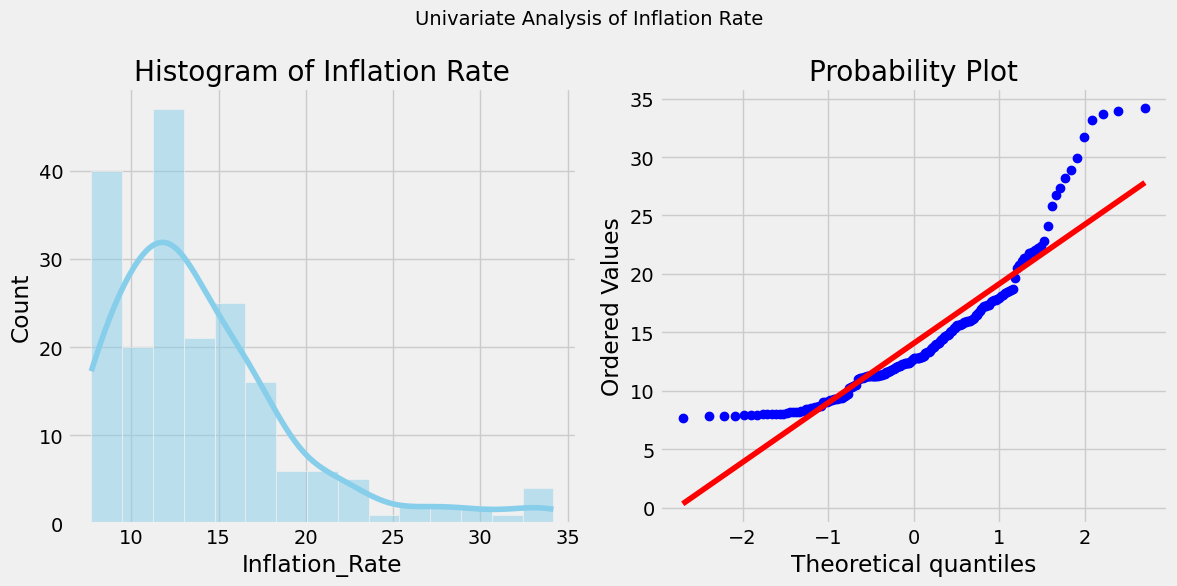

In [11]:
univariate_plot_inflation(df)

# 🔍 Observation

The data is negatively skewed which means that most of the values are concentrated on the higher end, with a longer tail stretching to the left (lower values). In simple terms, the data has more high inflation rates and fewer very low ones.


# 🔧 Data Transformation
Since many machine learning algorithms perform better with normally distributed data, we’ll apply a natural logarithm transformation to reduce skewness and bring the distribution closer to normal.

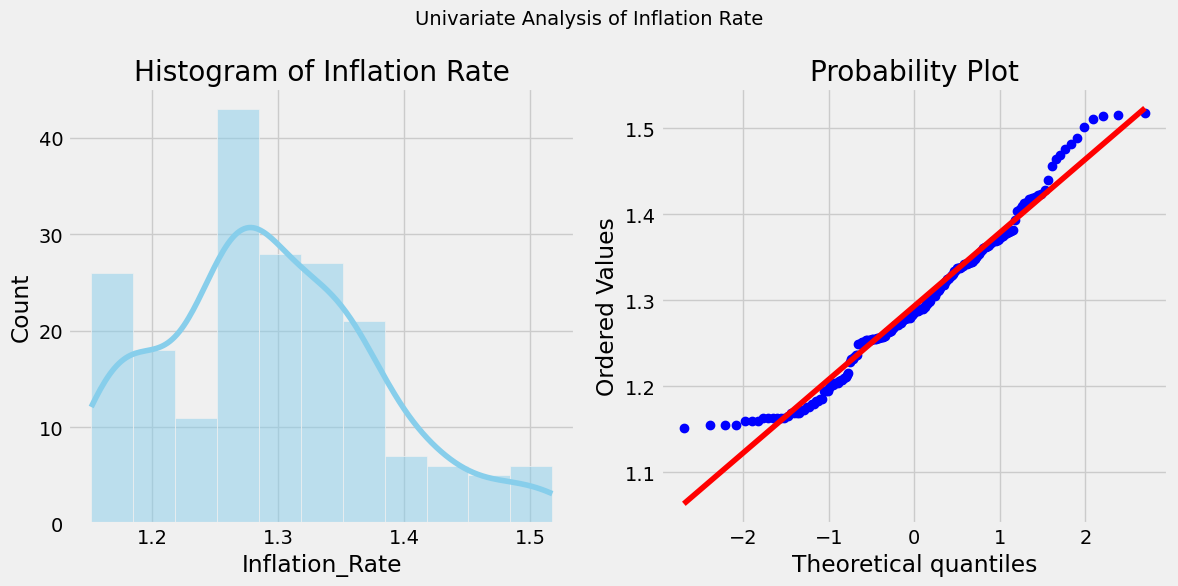

In [13]:
## Transforming the target variable sale price into natural log
df['Inflation_Rate']=np.log1p(df['Inflation_Rate'])

## Plot the data again to see changes
univariate_plot_inflation(df)

# ✅ Overview of Results:
-- Before Transformation: The inflation data was left-skewed, meaning a majority of values were high with a long tail of lower values.

-- After Transformation: The distribution is now closer to normal, which:

1. Improves performance and reliability of many predictive models.

2. Stabilizes variance and reduces the impact of outliers.

3. Makes the data more suitable for techniques that assume normality (e.g., linear regression).

# Predictor Variable Analysis

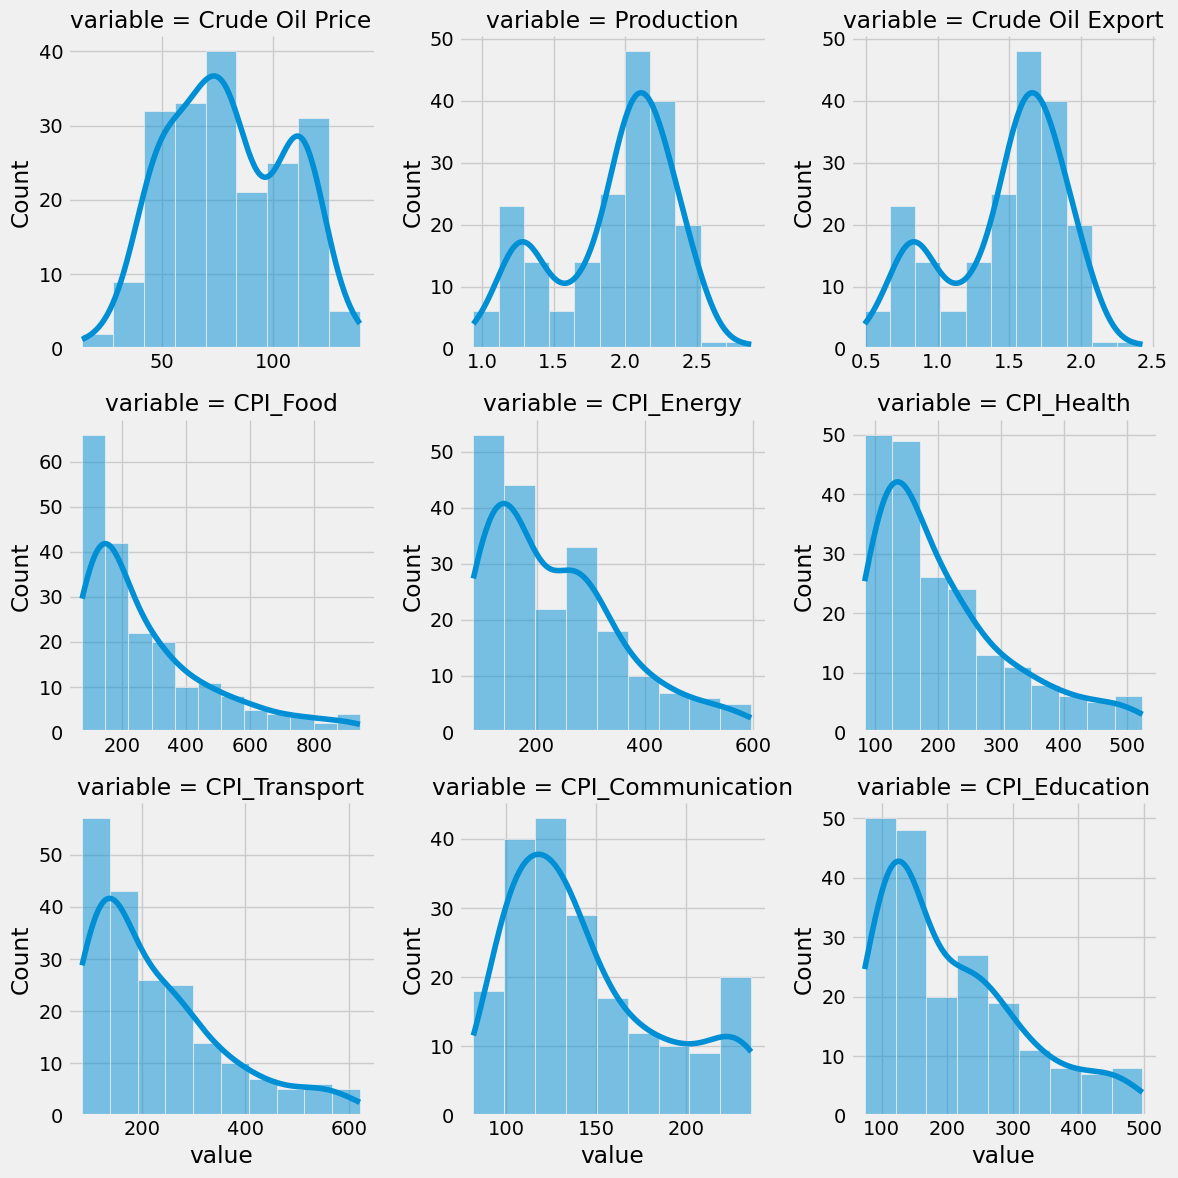

In [5]:

# Define your predictor variables (excluding the target)
predictor_cols = [
    'Crude Oil Price', 'Production', 'Crude Oil Export',
    'CPI_Food', 'CPI_Energy', 'CPI_Health',
    'CPI_Transport', 'CPI_Communication', 'CPI_Education'
]

# Melt the dataframe to long-form for FacetGrid plotting
f = pd.melt(df, value_vars=predictor_cols)

# Create the FacetGrid
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', kde=True)

plt.tight_layout()
plt.show()


# 🔍 Observation
The most of the predictor are negatively skewed (not so much in CPI_food, CPI_energy, CPI_health) which means that most of the values are concentrated on the higher end, with a longer tail stretching to the left (lower values). In simple terms, the data has more high inflation rates and fewer very low ones.This also imply the disadvantages that as been stated above already and we need to transfor the data.

# 🔧 Data Transformation

In [6]:
predictor_cols = [
    'Crude Oil Price', 'Production', 'Crude Oil Export',
    'CPI_Food', 'CPI_Energy', 'CPI_Health',
    'CPI_Transport', 'CPI_Communication', 'CPI_Education'
]



In [7]:
## this func. will ID any skewness in the variable and if any ifx it.
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax, skew

def fix_skewness(df):
    # select all skewed numeric col
    skewed_feat = df[predictor_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    high_skew = skewed_feat[abs(skewed_feat) > 0.5]
    skewed_feature = high_skew.index

    for feat in skewed_feature:
        try:
            if (df[feat] <= 0).any():
                continue  # skip non-positive data
            df.loc[:, feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
        except:
            print(f"Skipping {feat} due to Box-Cox error")

    return df


<Axes: xlabel='CPI_Education', ylabel='Density'>

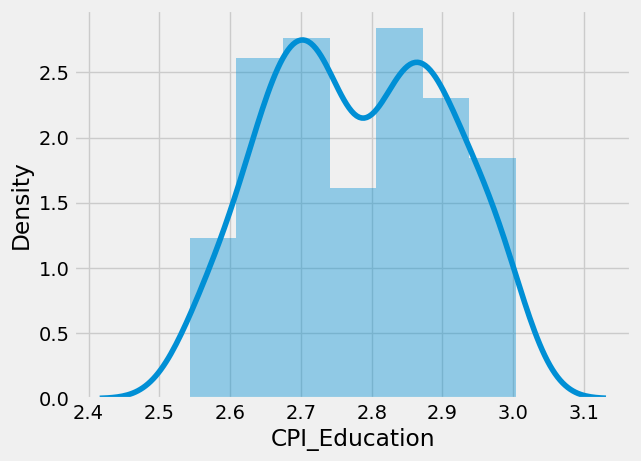

In [22]:
# Checking if transformation worked
sns.distplot(df['CPI_Education'])

<Axes: xlabel='CPI_Transport', ylabel='Density'>

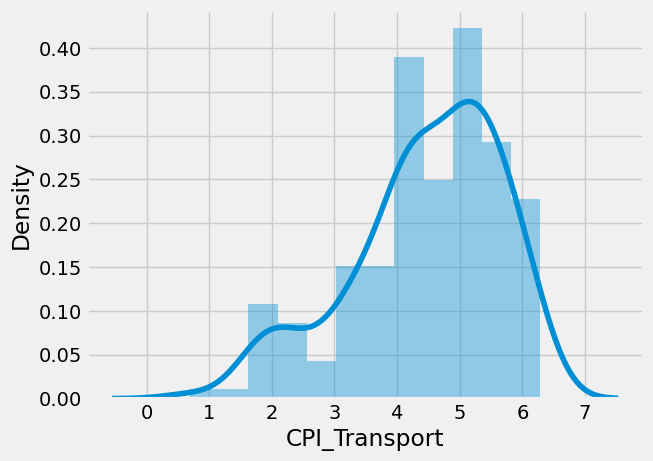

In [23]:
# Checking if transformation worked
sns.distplot(df['CPI_Transport'])

# ✅ Overview of Results:
-- Before Transformation: Majority of the predictor variables were left-skewed, meaning a majority of values were high with a long tail of lower values.

-- After Transformation: The distribution is now closer to normal, which:

1. Improves performance and reliability of many predictive models.

2. Stabilizes variance and reduces the impact of outliers.

3. Makes the data more suitable for techniques that assume normality (e.g., linear regression).

# 📐 Step 2: Outlier Handling

In this phase, we're identifying and treating extreme values that may distort the behavior of our predictive model.

Outliers can:

-- Skew distributions.

-- Mislead relationships between variables.

-- Reduce model accuracy and robustness.

# ✅ Handling the Target Variable Outliers

I'll use the Interquartile Range (IQR) method:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 – Q1

Any value < Q1 – 1.5×IQR or > Q3 + 1.5×IQR is considered an outlier and removed.

In [24]:
def remove_outliers_iqr(df, column):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before removal
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers detected in {column}: {outliers.shape[0]}")

    # Remove outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    print(f"Shape after removing outliers from {column}: {df_clean.shape}")

    return df_clean


In [31]:
remove_outliers_iqr(df, 'Inflation_Rate')

Outliers detected in Inflation_Rate: 0
Shape after removing outliers from Inflation_Rate: (194, 13)


,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,Jan,1.182268,94.26,18.959055,7.833769,2.132532,1.212337,0.915189,1.424008,0.896380,2.549470,2008-01-01
1,2008,Feb,1.162283,98.15,17.017482,6.982538,2.131564,1.381311,0.693147,1.788242,0.896359,2.550169,2008-02-01
2,2008,Mar,1.155229,103.73,16.606247,6.802163,2.139238,0.693147,1.551195,0.693147,0.896270,2.547610,2008-03-01
3,2008,Apr,1.169134,116.73,14.656211,5.946603,2.142090,1.130535,2.089323,1.828418,0.897215,2.542822,2008-04-01
4,2008,May,1.214985,126.57,16.403327,6.713151,2.145250,1.463837,2.216435,1.714974,0.897452,2.547829,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2023,Oct,1.468777,94.90,6.091417,2.201163,2.429676,6.039205,5.933721,6.116083,0.900891,2.984059,2023-10-01
190,2023,Nov,1.475716,85.76,5.146975,1.793585,2.431620,6.059989,5.956701,6.135510,0.900900,2.986113,2023-11-01
191,2023,Dec,1.481270,79.12,5.991945,2.158121,2.433785,6.083126,5.975002,6.153645,0.900907,2.987585,2023-12-01
192,2024,Jan,1.488570,82.18,6.929206,2.564528,2.436306,6.108150,6.000767,6.169173,0.900911,2.990034,2024-01-01


# ✅ Handling the Predictor Variable Outliers

I'll also use the Interquartile Range (IQR) method:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 – Q1

Any value < Q1 – 1.5×IQR or > Q3 + 1.5×IQR is considered an outlier and removed for all predictor variable all at once.

In [8]:
def remove_outliers_iqr_all(df, columns):
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
        print(f"Outliers detected in {column}: {outliers.shape[0]}")

        # Keep only non-outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
        print(f"Shape after removing outliers from {column}: {df_clean.shape}")

    return df_clean


In [9]:
df_clean = remove_outliers_iqr_all(df, predictor_cols)

Outliers detected in Crude Oil Price: 0
Shape after removing outliers from Crude Oil Price: (198, 13)
Outliers detected in Production: 0
Shape after removing outliers from Production: (198, 13)
Outliers detected in Crude Oil Export: 0
Shape after removing outliers from Crude Oil Export: (198, 13)
Outliers detected in CPI_Food: 11
Shape after removing outliers from CPI_Food: (187, 13)
Outliers detected in CPI_Energy: 0
Shape after removing outliers from CPI_Energy: (187, 13)
Outliers detected in CPI_Health: 2
Shape after removing outliers from CPI_Health: (185, 13)
Outliers detected in CPI_Transport: 0
Shape after removing outliers from CPI_Transport: (185, 13)
Outliers detected in CPI_Communication: 0
Shape after removing outliers from CPI_Communication: (185, 13)
Outliers detected in CPI_Education: 0
Shape after removing outliers from CPI_Education: (185, 13)


# ✅ Outlier Handling Complete: Overview

We have successfully identified and removed outliers from both our target variable (Inflation_Rate) and all predictor variables using the Interquartile Range (IQR) method. This ensures that extreme values, which could distort the model's understanding of relationships between variables, are now excluded from our dataset.

By doing so, we’ve improved the integrity of the data and minimized the risk of biased or misleading predictions during the modeling phase.

# 🛠️ Step 3: Feature Engineering

With the data now cleaned, de-skewed, and outliers handled, I proceed to the next critical phase: Feature Engineering.

This stage involves creating new variables that can enhance the predictive capacity of our model by:

1. Capturing hidden trends

2. Expressing economic relationships

3. Introducing interactions that better explain the behavior of inflation

4. I'm not just feeding the model more data I am feeding it better signals.

## 🔹 1. Growth Rate Features
Why?
Inflation often responds to how fast economic indicators are changing, not just their absolute values. Growth rates of production or exports reveal momentum and volatility, which might influence inflation trends.

Example:

-- A surge in production without a corresponding export increase could suggest local oversupply (possibly deflationary).

-- Rapid export growth might signal strong demand or currency impact.

In [5]:
df['Production_Growth'] = df['Production'].pct_change()
df['Crude_Export_Growth'] = df['Crude Oil Export'].pct_change()
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date,Production_Growth,Crude_Export_Growth
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,NaN,NaN
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,-0.041475,-0.052326
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,-0.009615,-0.012270
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,-0.048544,-0.062112
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,0.045918,0.059603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01,-0.076923,-0.112245
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01,-0.068182,-0.103448
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01,0.040650,0.064103
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01,-0.023438,-0.036145


In [6]:
# handling now missing values
columns_to_fill = ['Production_Growth', 'Crude_Export_Growth']
df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')
df


,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date,Production_Growth,Crude_Export_Growth
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,-0.041475,-0.052326
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,-0.041475,-0.052326
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,-0.009615,-0.012270
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,-0.048544,-0.062112
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,0.045918,0.059603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01,-0.076923,-0.112245
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01,-0.068182,-0.103448
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01,0.040650,0.064103
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01,-0.023438,-0.036145


## 🔹 2. Composite Variable: Export per Production
Why?
This ratio captures the dependency of production on exports. A country that produces a lot but exports little might have different inflation dynamics (more local supply pressure) than one where most production goes abroad.

In [7]:
df['Export_per_Production'] = df['Crude Oil Export'] / df['Production']
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date,Production_Growth,Crude_Export_Growth,Export_per_Production
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,-0.041475,-0.052326,0.792627
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,-0.041475,-0.052326,0.783654
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,-0.009615,-0.012270,0.781553
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,-0.048544,-0.062112,0.770408
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,0.045918,0.059603,0.780488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01,-0.076923,-0.112245,0.659091
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01,-0.068182,-0.103448,0.634146
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01,0.040650,0.064103,0.648438
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01,-0.023438,-0.036145,0.640000


## 🔹 3. Inflation-Sensitive Sector Index
Why?
Certain CPI categories — like food, energy, transport, and health are more directly influenced by inflationary pressures. Combining them into a single index helps track how core societal costs shift with inflation.

In [8]:
sensitive_sectors = ['CPI_Food', 'CPI_Transport', 'CPI_Energy', 'CPI_Health']
df['CPI_Sensitive_Avg'] = df[sensitive_sectors].mean(axis=1)
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date,Production_Growth,Crude_Export_Growth,Export_per_Production,CPI_Sensitive_Avg
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,-0.041475,-0.052326,0.792627,82.635113
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,-0.041475,-0.052326,0.783654,83.026736
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,-0.009615,-0.012270,0.781553,82.988334
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,-0.048544,-0.062112,0.770408,85.457191
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,0.045918,0.059603,0.780488,86.207749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01,-0.076923,-0.112245,0.659091,613.904790
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01,-0.068182,-0.103448,0.634146,629.755005
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01,0.040650,0.064103,0.648438,643.448112
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01,-0.023438,-0.036145,0.640000,656.924825


## 🔹 4. Interaction Term: Production × Export
Why?
Sometimes inflation is driven not by production or export individually, but by how they interact. For instance, high production and high exports might tighten local supply, which could drive prices up.

In [10]:
df['Production_x_Export'] = df['Production'] * df['Crude Oil Export']
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date,Production_Growth,Crude_Export_Growth,Export_per_Production,CPI_Sensitive_Avg,Production_x_Export
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,-0.041475,-0.052326,0.792627,82.635113,3.7324
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,-0.041475,-0.052326,0.783654,83.026736,3.3904
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,-0.009615,-0.012270,0.781553,82.988334,3.3166
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,-0.048544,-0.062112,0.770408,85.457191,2.9596
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,0.045918,0.059603,0.780488,86.207749,3.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01,-0.076923,-0.112245,0.659091,613.904790,1.1484
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01,-0.068182,-0.103448,0.634146,629.755005,0.9594
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01,0.040650,0.064103,0.648438,643.448112,1.0624
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01,-0.023438,-0.036145,0.640000,656.924825,1.0000


# 🔧 Feature Engineering Overview
In this section, we engineered new features to enhance the predictive power of our model by introducing domain-relevant variables that better capture the underlying economic dynamics affecting inflation.

In [11]:
## exporting my engineered dataframe so I can use it elsewhere
df.to_csv("prediction_analysis_ready_dataset.csv", index=False)